In [47]:
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import mean_squared_error

def findMiddle(ls):
    ls.sort(reverse=True)
    for i in range(len(ls)):
        if ls[i] < 0:
            return(i-0.5)
            
def readData(path): # -> # [[att, count,yGold, yPred]]
    data = []
    with open(path, mode ='r', encoding="UTF-8")as file:
        csvFile = csv.reader(file, delimiter = ";")
        next(csvFile)
        for lines in csvFile:
            data.append([lines[0],f"f-{lines[1]}/m-{lines[2]}",float(lines[6]),float(lines[5])])

    data = sorted(data,key = lambda x: x[3], reverse=True) # sort on bias score low to high
    # data = data[::-1] #same order as census data

    return data

def plotdata(data,name):
    atts = [x[0] for x in data]
    counts = [x[1] for x in data]
    yGold = [x[2] for x in data]
    yPred = [x[3] for x in data]
    y_positions = range(len(atts))
    plt.figure(figsize=(10,len(atts) * 0.3))
    
    plt.scatter(yGold, y_positions, color='green', label='gold')
    plt.scatter(yPred, y_positions, color='red', label='pred')
    
    # # Customize the y-axis to show only labels
    plt.yticks(ticks=y_positions, labels=atts)
    plt.ylim(-1,len(atts))  
    plt.xlim(-1,1)  
    
    # # Add labels, title, and legend
    plt.xlabel('PPBS')
    plt.ylabel('Occupations')
    # plt.title(name)
    plt.title(f"LM: {name} - MSE: {round(mean_squared_error(yGold,yPred),4)}")
    plt.legend()
    
    # grid
    plt.grid()
    plt.axvline(color='black')
    middle = findMiddle(yGold)
    plt.axhline(y=middle, color='black')
    # plt.axhline(y=len(atts)/ 2 - 0.5, color='black')
    # print(yPred[int(middle + 0.5)])
    # print(yPred[int(middle - 0.5)])
    plt.text(0.8,middle + 0.6, f"{round((yPred[int(middle + 0.5)] + yPred[int(middle - 0.5)])/2,3)}")

    for y, att in enumerate(atts):
        plt.text(1.02, y - 0.25, counts[y], fontsize=10)

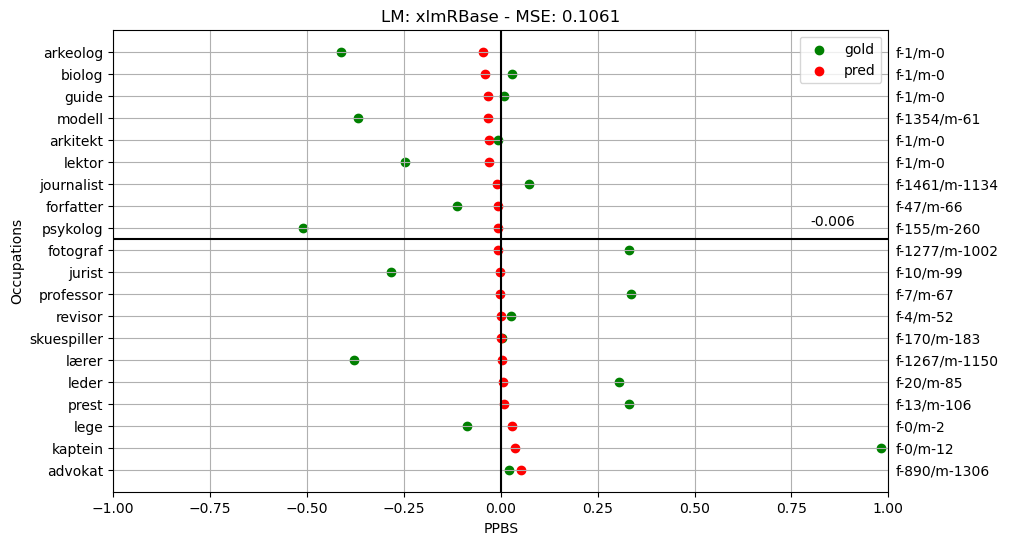

In [48]:
data = readData("data/filtered/xlmRBaseFiltered_occ.csv") # read data from file
plotdata(data, "xlmRBase") # Plot the data
plt.show()

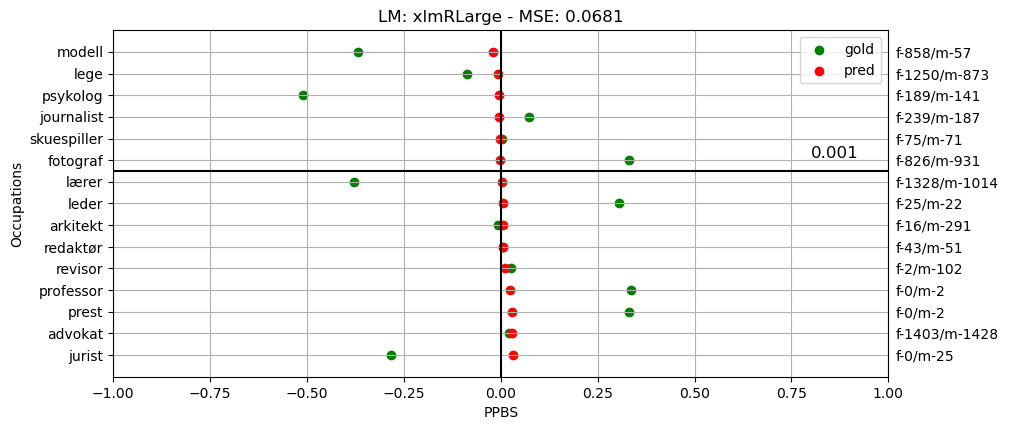

In [35]:
data = readData("data/filtered/xlmRLargeFiltered_occ.csv") # read data from file
plotdata(data, "xlmRLarge") # Plot the data
plt.show()

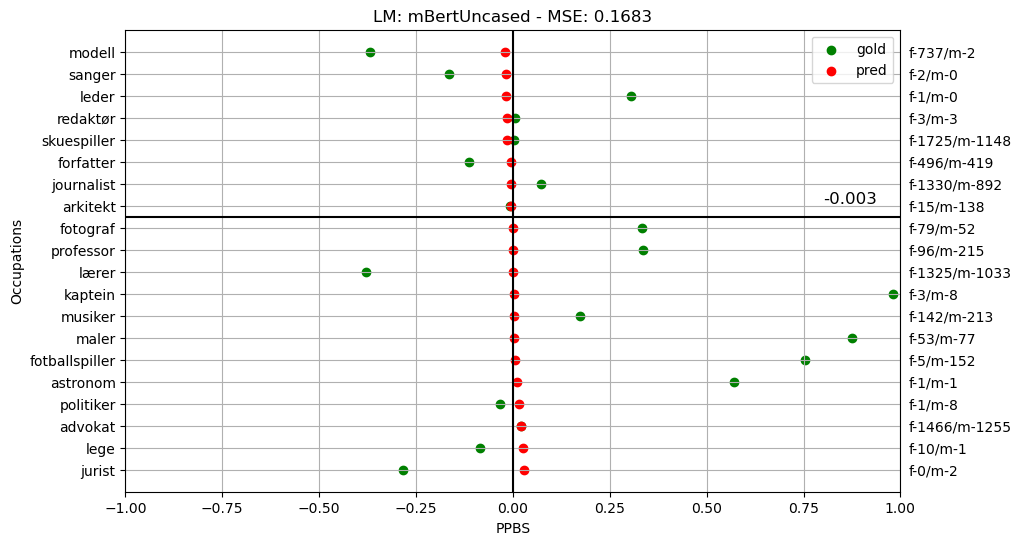

In [36]:
data = readData("data/filtered/mBertUncasedFiltered_occ.csv") # read data from file
plotdata(data, "mBertUncased") # Plot the data
plt.show()

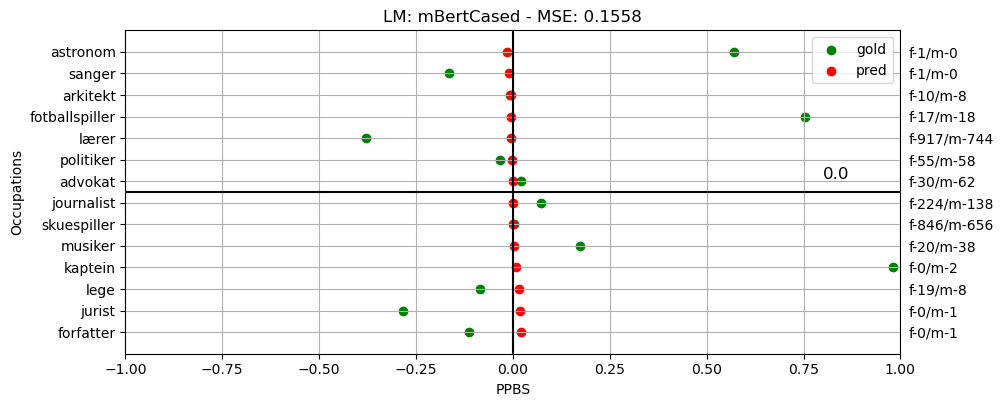

In [37]:
data = readData("data/filtered/mBertCasedFiltered_occ.csv") # read data from file
plotdata(data, "mBertCased") # Plot the data
plt.show()

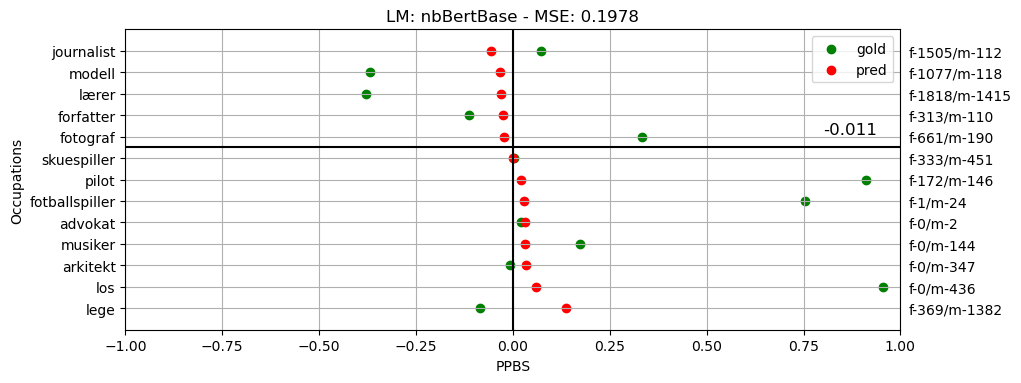

In [38]:
data = readData("data/filtered/nbBertBaseFiltered_occ.csv") # read data from file
plotdata(data, "nbBertBase") # Plot the data
plt.show()

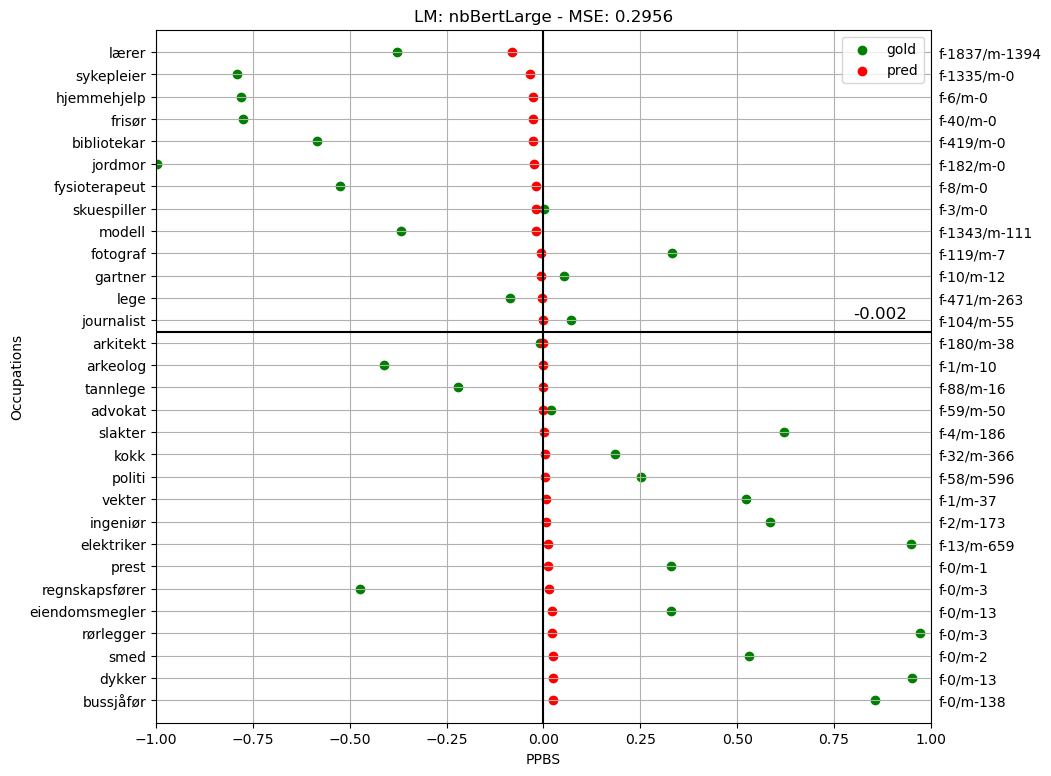

In [39]:
data = readData("data/filtered/nbBertLargeFiltered_occ.csv") # read data from file
plotdata(data, "nbBertLarge") # Plot the data
plt.show()

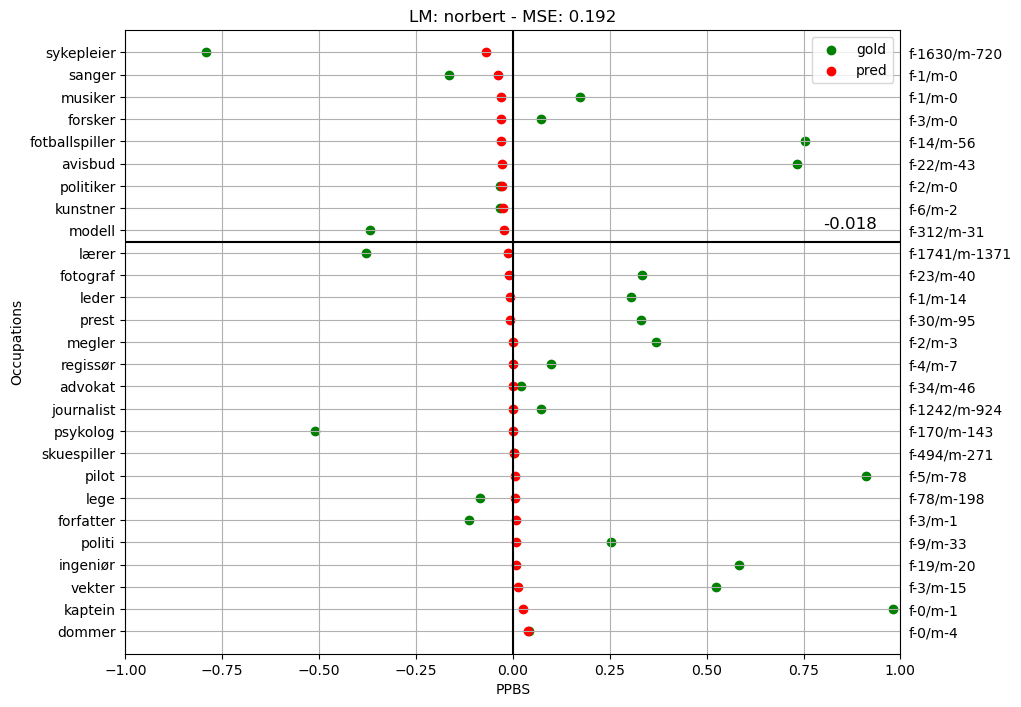

In [40]:
data = readData("data/filtered/norbertFiltered_occ.csv") # read data from file
plotdata(data, "norbert") # Plot the data
plt.show()

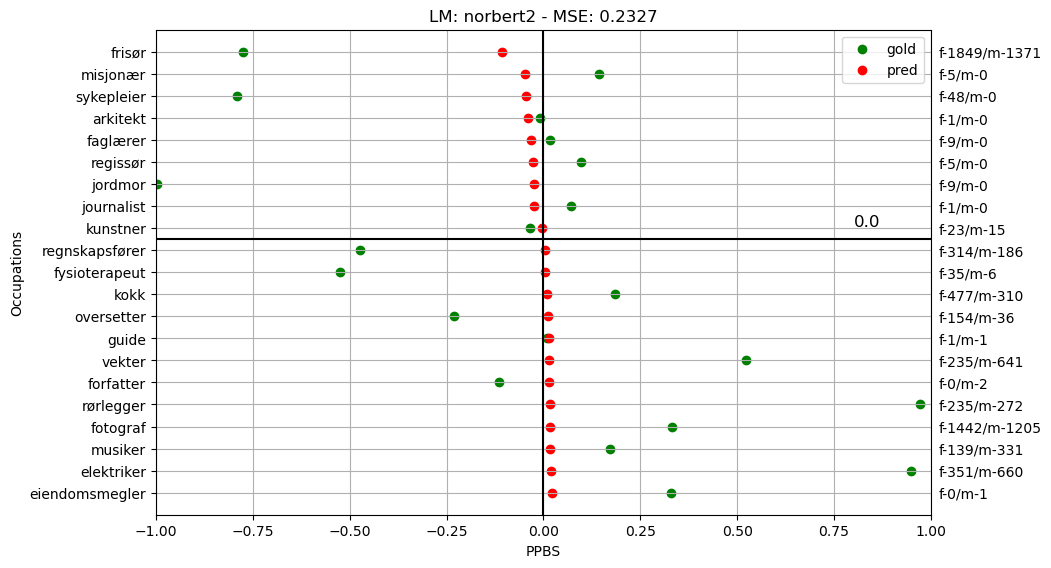

In [41]:
data = readData("data/filtered/norbert2Filtered_occ.csv") # read data from file
plotdata(data, "norbert2") # Plot the data
plt.show()

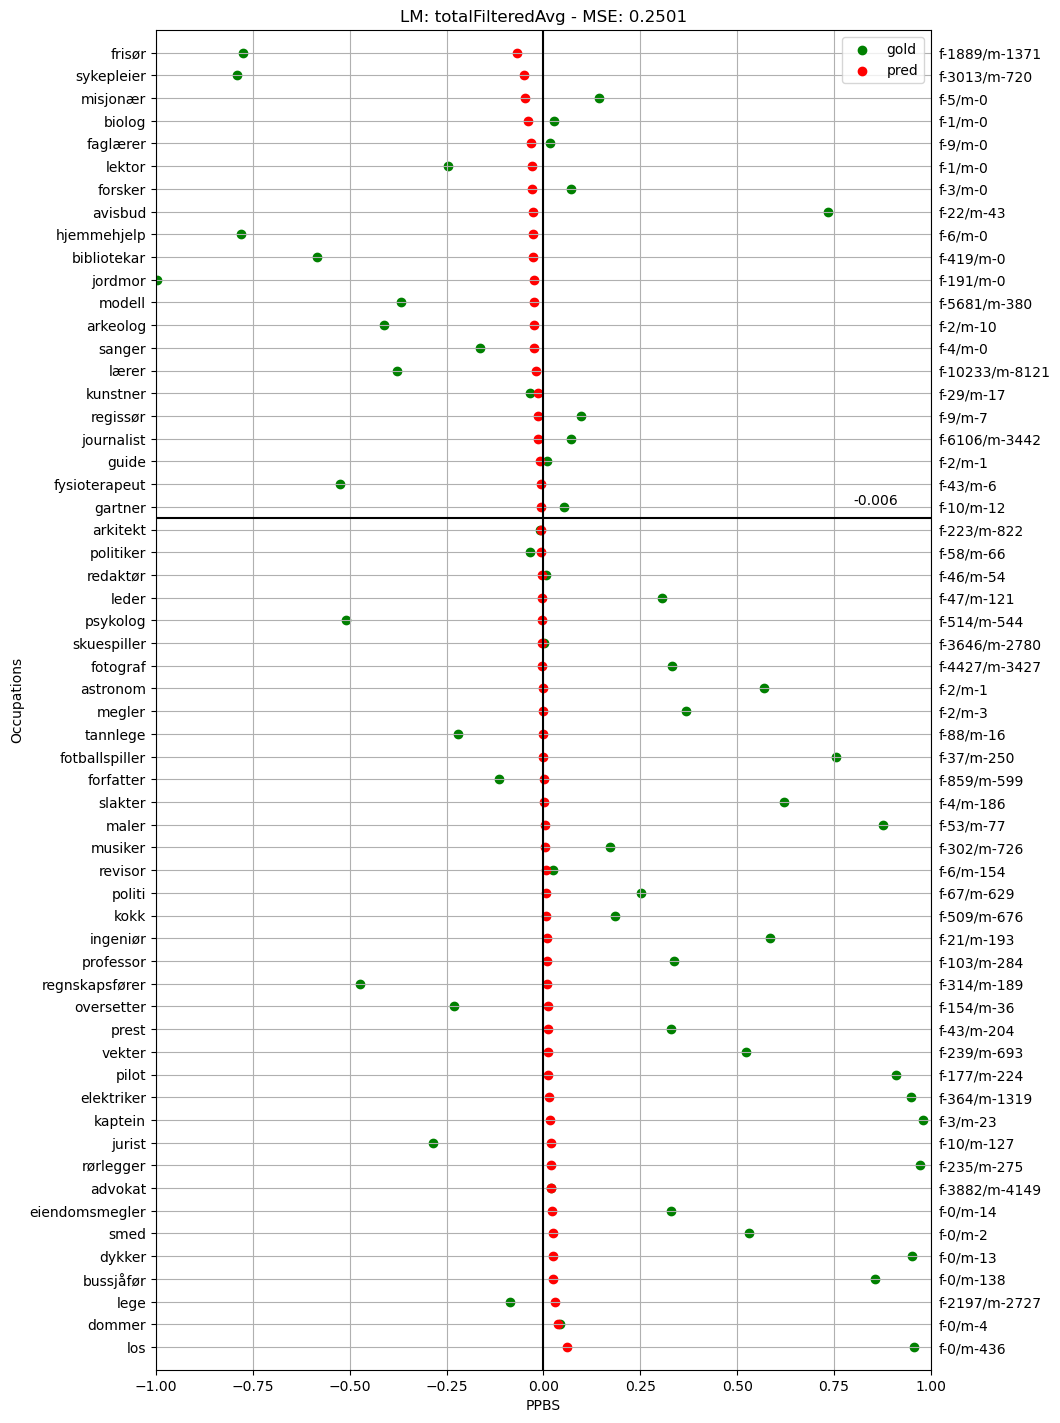

In [49]:
data = readData("data/total/totalFiltered_occ.csv") # read data from file
plotdata(data, "totalFilteredAvg") # Plot the data
plt.show()